In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv(r"C:\Users\hi\Desktop\Data Analytics\Data Sets\Old\Telco_Cusomer_Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Univariate Data Analysis

<Axes: title={'center': 'Customer Distribution by Gender'}>

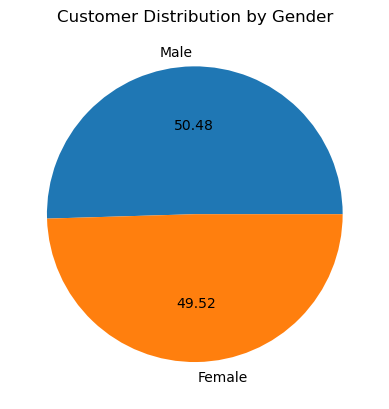

In [3]:
churn.gender.value_counts().plot(kind='pie',autopct='%0.2f', ylabel='', title='Customer Distribution by Gender')

In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: title={'center': 'Distribution of type of Internet servive used by customers'}, xlabel='InternetService', ylabel='Count'>

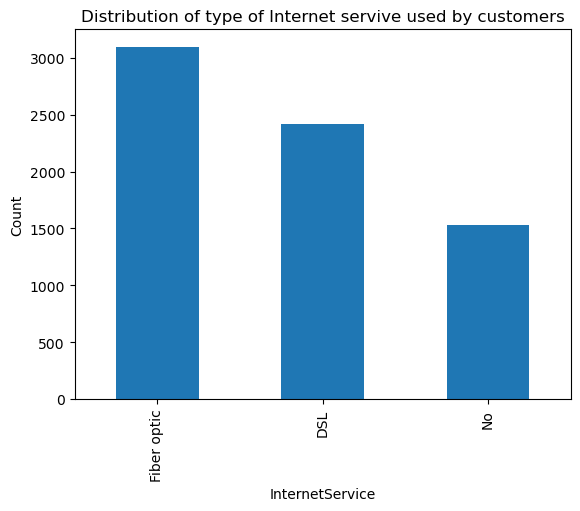

In [5]:
churn.InternetService.value_counts().plot(kind='bar', ylabel='Count', title='Distribution of type of Internet servive used by customers')

In [6]:
churn['count'] = 1
churn.groupby(churn.tenure)['count'].sum()

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 73, dtype: int64

In [7]:
#churn['tenure_bins']

In [8]:
churn['tenure_bins'] = pd.cut(churn.tenure, bins=[0,12,24,48,72]).astype('str')

churn['tenure_bins'] = churn['tenure_bins'].str.replace('(','[').str.replace(',',' -')
churn['tenure_bins'] = churn['tenure_bins'].astype('category')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [9]:
churn = churn[churn.tenure_bins != 'nan']

In [10]:
churn['tenure_bins'] = churn.tenure_bins.astype('str')
churn.tenure_bins.unique()

array(['[0 - 12]', '[24 - 48]', '[12 - 24]', '[48 - 72]'], dtype=object)

In [11]:
churn.groupby('tenure_bins')['tenure'].median().sort_values().index

Index(['[0 - 12]', '[12 - 24]', '[24 - 48]', '[48 - 72]'], dtype='object', name='tenure_bins')

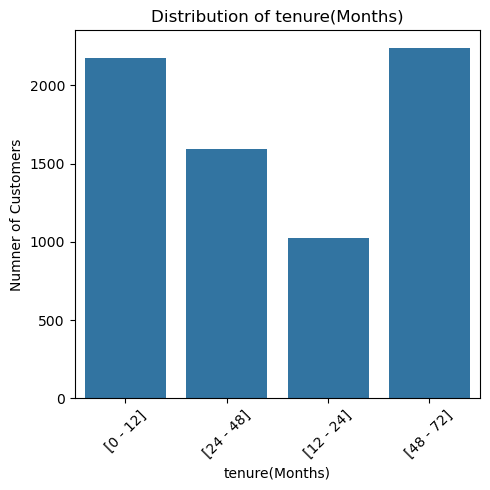

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='tenure_bins')
plt.ylabel('Numner of Customers')
plt.xlabel('tenure(Months)')
plt.title('Distribution of tenure(Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of tenure.png')
plt.show()

In [13]:
pd.set_option('display.max_columns', None)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,count,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,[0 - 12]
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,[24 - 48]
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,[0 - 12]
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,[24 - 48]
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,[0 - 12]


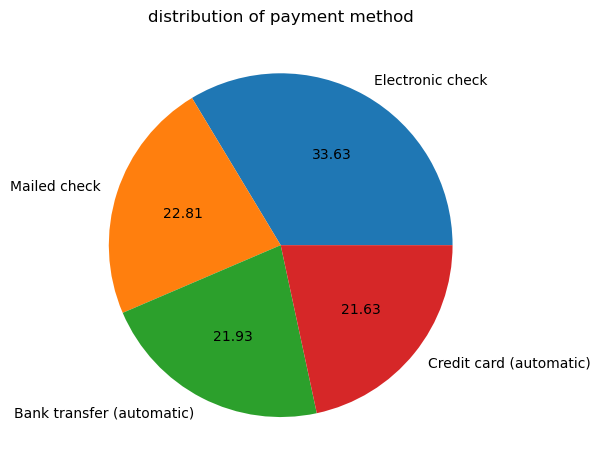

In [27]:
churn.PaymentMethod.value_counts().plot(kind='pie', autopct='%0.2f', ylabel='', title='distribution of payment method')
plt.tight_layout()
plt.savefig('distribution of payment method.png')

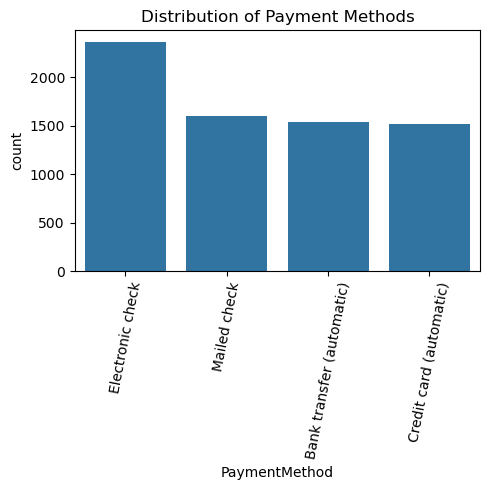

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='PaymentMethod')
plt.xticks(rotation=79)
plt.title('Distribution of Payment Methods')
plt.tight_layout()
plt.savefig('Distribution of Payment Methods.png')
plt.show()

In [16]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'count',
       'tenure_bins'],
      dtype='object')

In [17]:
churned = churn[churn.Churn== 'Yes']

<Axes: title={'center': 'Distribution of Churned by Contract'}>

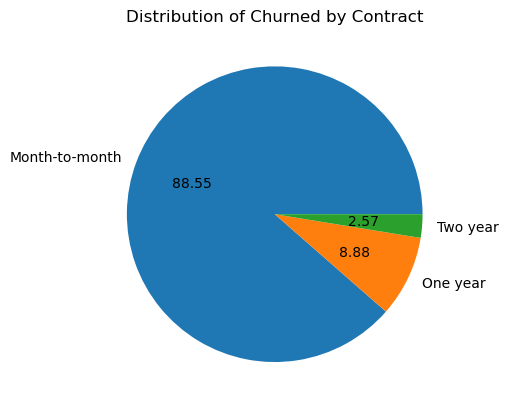

In [18]:
churned.Contract.value_counts().plot(kind='pie', autopct='%0.2f', ylabel='', title='Distribution of Churned by Contract')

## BIVARIATE ANALYSIS


In [19]:
#churn.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', ylabel='Monthly Charges')

# MONTHLY CHARGES AND CHURN

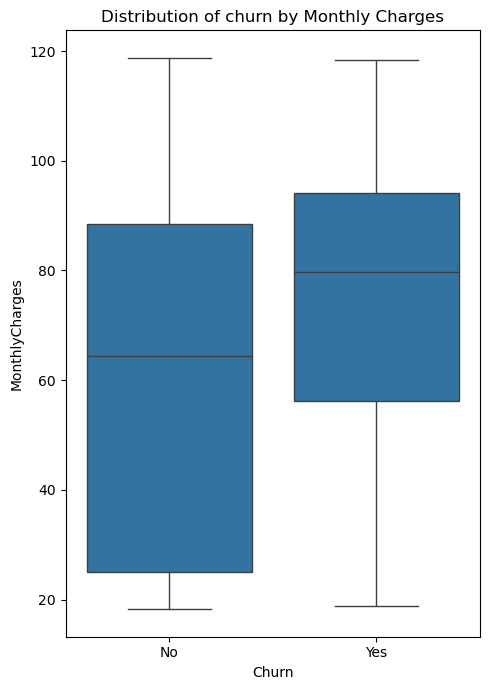

In [20]:
plt.figure(figsize=(5,7))
sns.boxplot(x='Churn', y='MonthlyCharges' , data=churn)
plt.title('Distribution of churn by Monthly Charges')
plt.tight_layout()
plt.savefig('Distribution of churn by Monthly Charges.png')
plt.show()

In [21]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'count',
       'tenure_bins'],
      dtype='object')

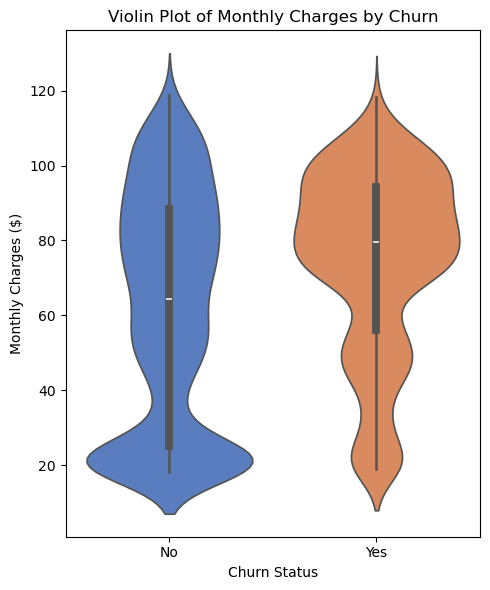

In [22]:
plt.figure(figsize=(5,6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=churn, hue='Churn', palette='muted', legend=False)
plt.title('Violin Plot of Monthly Charges by Churn')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.savefig('churn_violin_plot.png')

# grouped chart of gender and churn

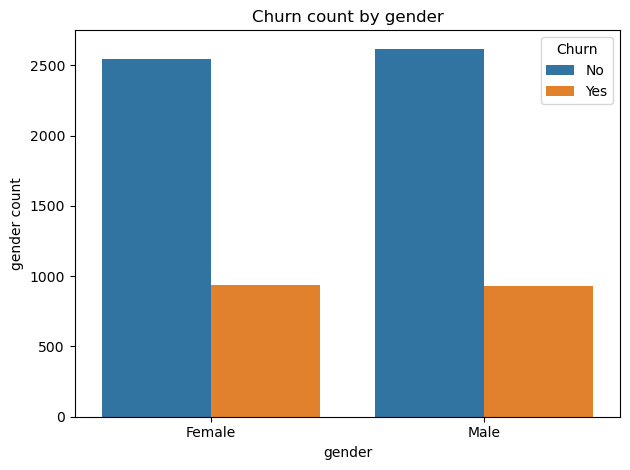

In [23]:
sns.countplot(data=churn, x='gender', hue='Churn', )
plt.title('Churn count by gender')
plt.ylabel('gender count')
plt.xlabel('gender')
plt.tight_layout()
plt.savefig('Churn count by gender.png')
plt.show()

#### PAYMENT METHOD VS CHURN

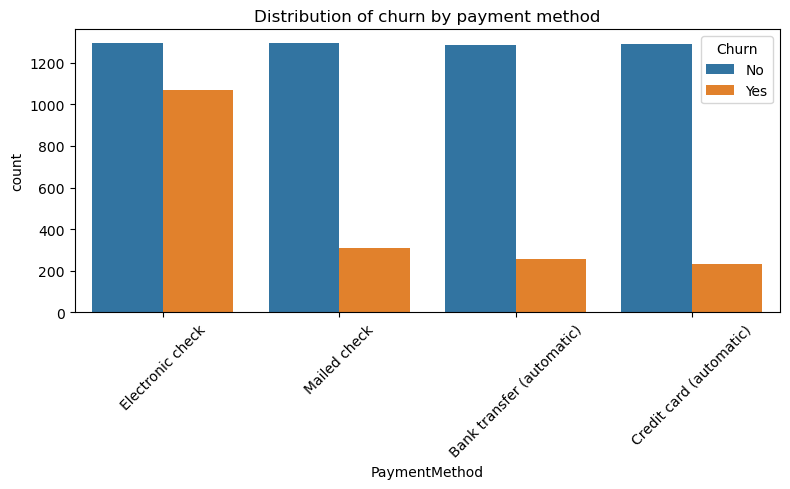

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=churn, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('Distribution of churn by payment method')
plt.tight_layout()
plt.savefig('Distribution churn by payment method.png')
plt.show()

### DISTRIBUTION OF CHURN BY INTERNET SERVICE

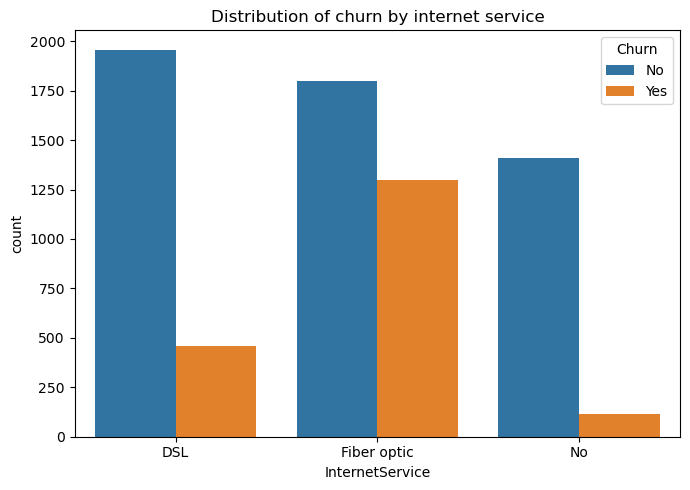

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(data=churn, x='InternetService', hue='Churn', )
plt.title('Distribution of churn by internet service')
plt.tight_layout()
plt.savefig('distribution_of_churn_by_internet_service.png')
plt.show()

### DISTRIBUTION OF CHURN BY CONTRACT TYPE

<function matplotlib.pyplot.show(close=None, block=None)>

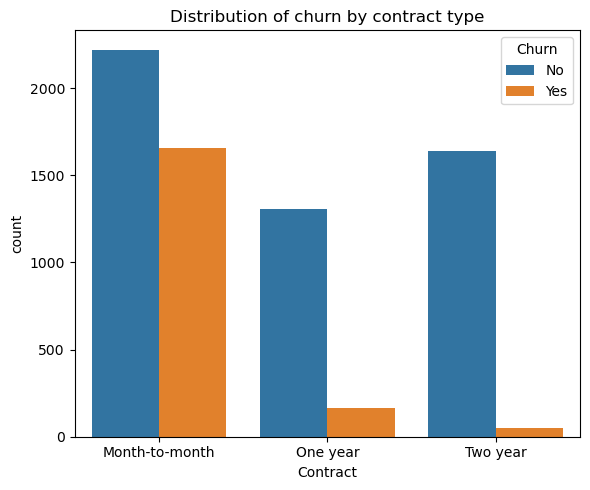

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(data=churn, x='Contract', hue='Churn')
plt.title('Distribution of churn by contract type')
plt.tight_layout()
plt.savefig('distribution of churn by contract.png')
plt.show